In [44]:
# Importing the libraries:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# remove warning
import warnings
warnings.filterwarnings(action='ignore')
print('Libraries have been imported')

Libraries have been imported


# Step-1: Gathering Data

In [45]:
# Reading the dengue data 
Dengue = pd.read_excel('Data/DengueAndClimateBangladesh.xlsx')
df = Dengue.copy()
df.head(10)

,Month,Dengue Cases
0,2008-01-01,0
1,2008-02-01,0
2,2008-03-01,0
3,2008-04-01,0
4,2008-05-01,0
5,2008-06-01,0
6,2008-07-01,160
7,2008-08-01,473
8,2008-09-01,334
9,2008-10-01,184


# Step-2: Data preprocessing

In [46]:
df.set_index('Month', inplace=True)

In [47]:
# Checking for some values of the data
df.head()

,Dengue Cases
Month,
2008-01-01,0
2008-02-01,0
2008-03-01,0
2008-04-01,0
2008-05-01,0


# Step-3: Exploratory Data Analysis (EDA)

In [48]:
# printing information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2008-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Dengue Cases  192 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dengue Cases,192.0,2828.359375,10934.576551,0.0,7.0,69.0,414.25,79598.0


### Visual test

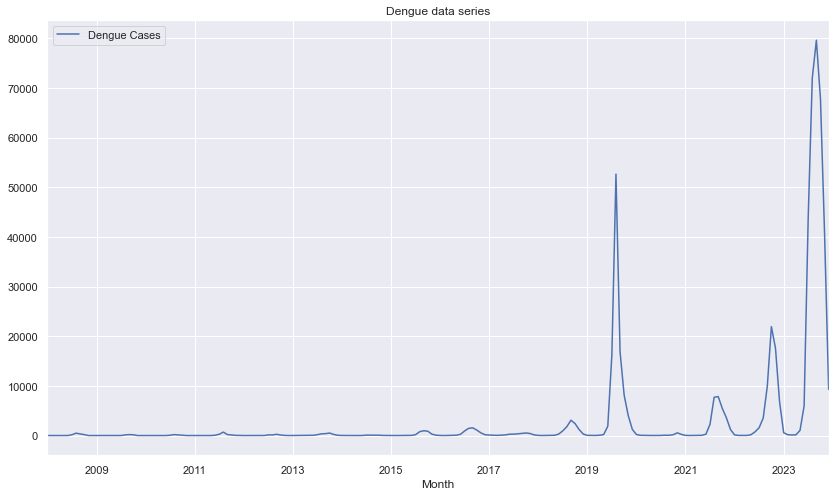

In [50]:
data = df.copy()
data.plot(figsize=(14,8), title='Dengue data series')
sns.set(style='dark')
plt.grid()
plt.show()

<font color ='red'>Note: </font> Although its very clear that we have a trend (varying mean) in the above series, this visual approach might not always give accurate results. It is better to confirm the observations using some statistical tests.

# Step-4: Performing the ADF test on the series

In [51]:
# Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [52]:
# Taking out the passengers number as a series.
series = df['Dengue Cases'].values
series

array([    0,     0,     0,     0,     0,     0,   160,   473,   334,
         184,     0,     0,     0,     0,     0,     0,     1,     0,
           4,   125,   188,   154,     0,     0,     0,     0,     0,
           0,     0,     0,    61,   183,   120,    45,     1,     0,
           0,     0,     0,     0,     0,    61,   255,   691,   193,
         114,    36,     9,     0,     0,     0,     0,     0,    10,
         129,   122,   246,   107,    27,     0,     6,     7,     3,
           3,    12,    50,   172,   339,   385,   501,   218,    53,
          15,     7,     2,     0,     8,     9,    82,    80,    76,
          63,    22,    11,     0,     0,     2,     6,    10,    28,
         171,   765,   965,   869,   271,    75,    13,     3,    17,
          38,    70,   254,   926,  1451,  1544,  1077,   522,   145,
          92,    58,    36,    73,   134,   267,   286,   346,   430,
         512,   409,   126,    26,     7,    19,    29,    52,   295,
         946,  1796,

In [53]:
# ADF Test
result = adfuller(series, autolag='AIC')
result

(-0.30293180549616705,
 0.9250880732150504,
 8,
 183,
 {'1%': -3.466598080268425,
  '5%': -2.8774669520682674,
  '10%': -2.5752604356654425},
 3536.2011685367597)

In [54]:
test_result=adfuller(df['Dengue Cases'])
test_result

(-0.30293180549616705,
 0.9250880732150504,
 8,
 183,
 {'1%': -3.466598080268425,
  '5%': -2.8774669520682674,
  '10%': -2.5752604356654425},
 3536.2011685367597)

The null and alternate hypothesis of this test are: 

* Null Hypothesis: The series has a unit root (value of a =1)
    
* Alternate Hypothesis: The series has no unit root.


* Ho: It is non stationary

* H1: It is stationary

If we fail to reject the null hypothesis, we can say that the series is non-stationary.

In [55]:
def adfuller_test(Cases):
    result=adfuller(Cases)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [56]:
adfuller_test(series)

ADF Test Statistic : -0.30293180549616705
p-value : 0.9250880732150504
#Lags Used : 8
Number of Observations Used : 183
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


 <font color ='red'>Note: </font> Here in the results, we can see that the p-value for time series is greater than 0.05, and we can say we fail to reject the null hypothesis and the time series is non-stationary. 

In [57]:
df['Dengue Cases'].head(10)

Month
2008-01-01      0
2008-02-01      0
2008-03-01      0
2008-04-01      0
2008-05-01      0
2008-06-01      0
2008-07-01    160
2008-08-01    473
2008-09-01    334
2008-10-01    184
Name: Dengue Cases, dtype: int64

## Difference

In [58]:
df['First-order Difference'] = df['Dengue Cases'] - df['Dengue Cases'].shift(1)


In [59]:
df['Seasonal First Difference']=df['Dengue Cases'] - df['Dengue Cases'].shift(12)

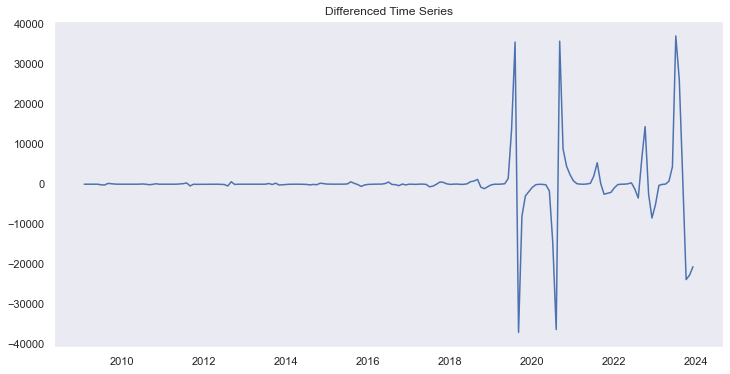

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
df['Differenced'] = df['Dengue Cases'].diff(1)  # First-order differencing
df['Seasonal_Differenced'] = df['Differenced'].diff(12)  # Seasonal differencing

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df['Seasonal_Differenced'])
plt.title('Differenced Time Series')
plt.show()


In [61]:
df.head(3)

,Dengue Cases,First-order Difference,Seasonal First Difference,Differenced,Seasonal_Differenced
Month,,,,,
2008-01-01,0,NaN,NaN,NaN,NaN
2008-02-01,0,0.0,NaN,0.0,NaN
2008-03-01,0,0.0,NaN,0.0,NaN


In [62]:
# Applying test dickey fuller test
adfuller_test(df['Differenced'].dropna())

ADF Test Statistic : -9.193825761245678
p-value : 2.0885016164987498e-15
#Lags Used : 7
Number of Observations Used : 183
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [63]:
# Applying test dickey fuller test
adfuller_test(df['Seasonal_Differenced'].dropna())

ADF Test Statistic : -5.407121201689916
p-value : 3.27248177621712e-06
#Lags Used : 11
Number of Observations Used : 167
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Accoording to Dfuller test I=d=1

In [64]:
## Applying test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.1837121617175046
p-value : 0.21221002128803496
#Lags Used : 13
Number of Observations Used : 166
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


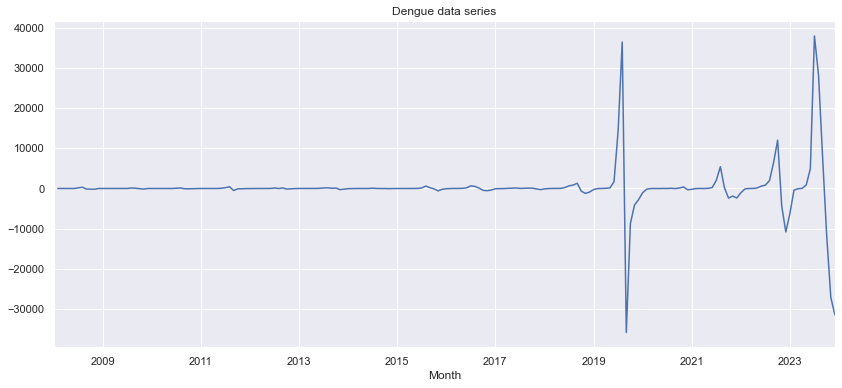

In [65]:
df['First-order Difference'].plot(figsize=(14,6), title='Dengue data series')
sns.set(style='dark')
plt.grid()
plt.show()

## Auto Regressive Model

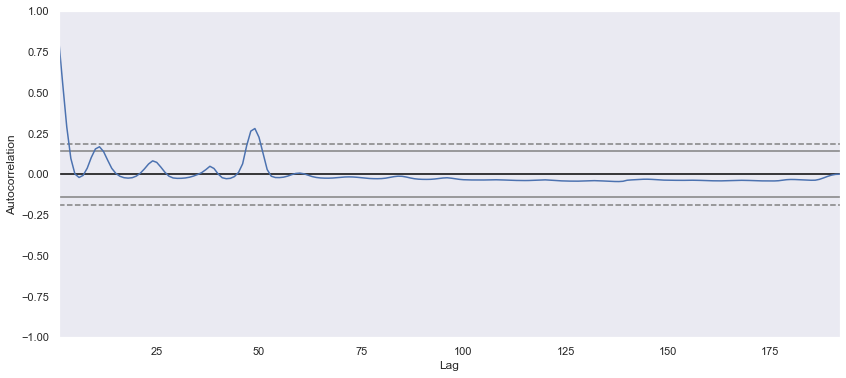

In [66]:
from pandas.plotting import autocorrelation_plot
plt.subplots(figsize=(14,6))
autocorrelation_plot(df['Dengue Cases'])
sns.set(style='dark')
plt.grid()
plt.show()

In [67]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

* Identification of an AR model is often best done with the PACF.
* Identification of an MA model is often best done with the ACF rather than the PACF.

<Figure size 864x288 with 0 Axes>

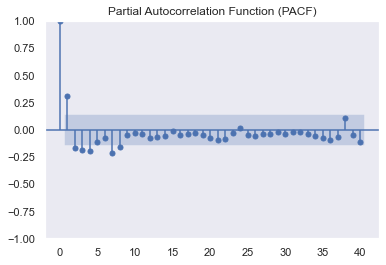

In [68]:
# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(df['First-order Difference'].iloc[2:], lags=40, title='Partial Autocorrelation Function (PACF)')
plt.show()

According to PACF plot AR=p=1

<Figure size 864x288 with 0 Axes>

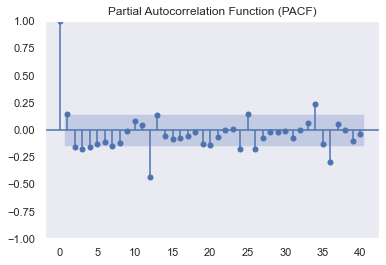

In [69]:
# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(df['Seasonal_Differenced'].iloc[13:], lags=40, title='Partial Autocorrelation Function (PACF)')
plt.show()

<Figure size 864x288 with 0 Axes>

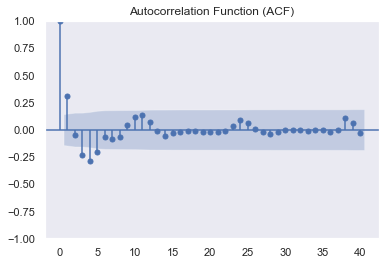

In [70]:
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(df['First-order Difference'].iloc[2:], lags=40, title='Autocorrelation Function (ACF)')
plt.show()

According to PACF plot MA=q=1

<Figure size 864x288 with 0 Axes>

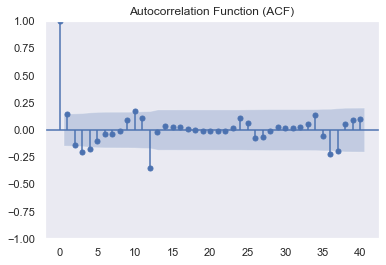

In [71]:
# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(df['Seasonal_Differenced'].iloc[13:], lags=40, title='Autocorrelation Function (ACF)')
plt.show()

ARIMA should be selected when data is not Seasonal

#  AIC Test

In [72]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.eval_measures import aic



# Function to evaluate ARIMA models with different parameters and return AIC
def evaluate_arima_model(train_data, arima_order):
    # Fit the ARIMA model
    model = ARIMA(train_data, order=arima_order)
    results = model.fit()
    
    # Calculate AIC
    aic_score = aic(results.llf, len(train_data), results.df_model)
    
    return aic_score

# Specify the range of values for p, d, and q
p_values = range(0, 3)  # adjust as needed
d_values = range(0, 2)  # adjust as needed
q_values = range(0, 3)  # adjust as needed

# Print the header
print("{:<15} {:<15} {:<15} {:<15}".format("p", "d", "q", "AIC"))

# Iterate over parameter combinations and print AIC scores
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                aic_score = evaluate_arima_model(df['Dengue Cases'], order)
                print("{:<15} {:<15} {:<15} {:<15}".format(p, d, q, round(aic_score, 2)))
            except:
                continue


p               d               q               AIC            
0               0               0               4937.39        
0               0               1               3974.52        
0               0               2               3900.79        
0               1               0               3884.05        
0               1               1               3861.91        
0               1               2               3862.56        
1               0               0               3892.29        
1               0               1               3860.91        
1               0               2               3855.69        
1               1               0               3863.35        
1               1               1               3863.18        
1               1               2               3865.1         
2               0               0               3846.4         
2               0               1               3846.06        
2               0               2       

# Forecasting

In [73]:
# For non-seasonal data
#p=1, d=1, q=1
from statsmodels.tsa.arima.model import ARIMA

In [74]:
model=ARIMA(df['Dengue Cases'],order=(1,1,1))
model_fit=model.fit()

In [75]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Dengue Cases   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1928.592
Date:                Tue, 30 Jan 2024   AIC                           3863.184
Time:                        16:50:28   BIC                           3872.941
Sample:                    01-01-2008   HQIC                          3867.136
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1527      0.152      1.004      0.316      -0.146       0.451
ma.L1          0.2365      0.173      1.364      0.173      -0.103       0.576
sigma2      3.556e+07   1.93e-08   1.84e+15      0.000    3.56e+07    3.56e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10259.83
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):            7000.84   Skew:                            -1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.58e+30. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Month'>

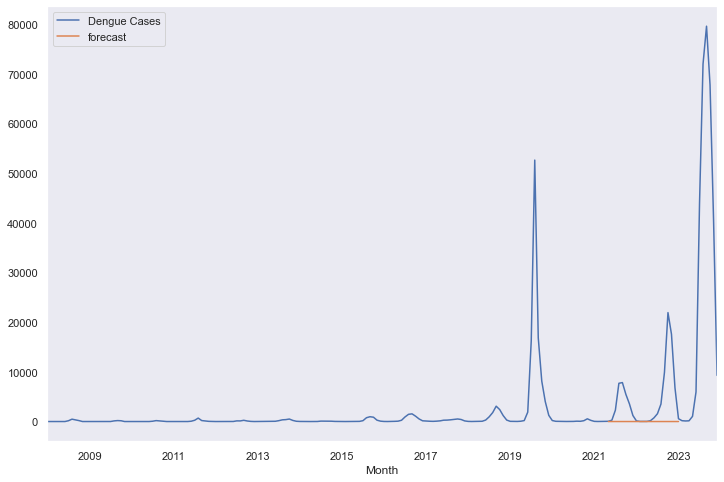

In [76]:
df['forecast']=model_fit.predict(start=160,end=180,dynamic=True)
df[['Dengue Cases','forecast']].plot(figsize=(12,8))

In [77]:
import statsmodels.api as sm

In [78]:
model=sm.tsa.statespace.SARIMAX(df['Dengue Cases'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<AxesSubplot:xlabel='Month'>

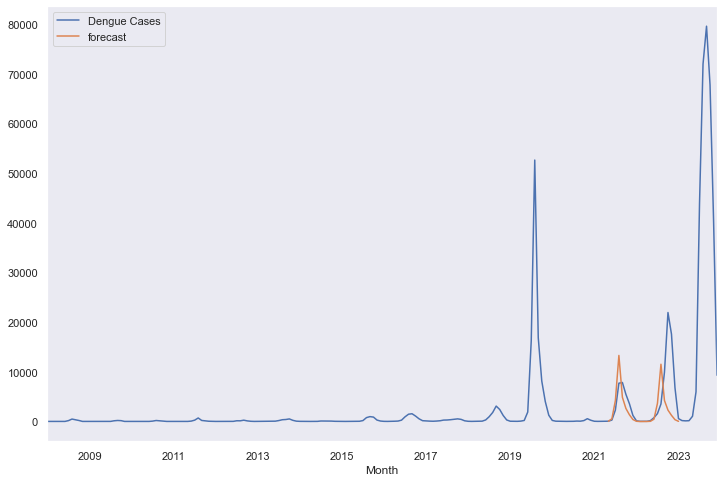

In [79]:
df['forecast']=results.predict(start=160,end=180,dynamic=True)
df[['Dengue Cases','forecast']].plot(figsize=(12,8))

In [80]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,36)]

In [81]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [82]:
future_datest_df.tail()

,Dengue Cases,First-order Difference,Seasonal First Difference,Differenced,Seasonal_Differenced,forecast
2026-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2026-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2026-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2026-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2026-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
future_df=pd.concat([df,future_datest_df])

# Prediction

<AxesSubplot:>

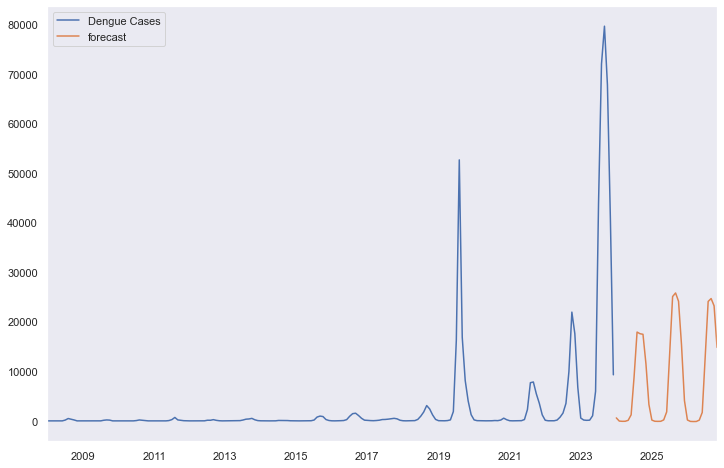

In [84]:
future_df['forecast'] = results.predict(start = 192, end = 228, dynamic= True)  
future_df[['Dengue Cases', 'forecast']].plot(figsize=(12, 8))